In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt

import sedkcorr.sed_fitting.prospector as sedp

In [2]:
#sn_name = "CSS120424_01"
sn_name = "PTF10qjq"

data = pandas.read_csv("SNf_mag_3kpc_prospector.dat", sep=' ', index_col='SN_name')
test_data = data.loc[sn_name]
#test_data

In [3]:
test = sedp.ProspectorSEDFitter()
test.set_run_params(outfile="test_snf_"+sn_name)
test.set_run_params(mcmc="dynesty")#, do_levenberg=False, do_powell=True)
test.set_run_params(model_params="continuity_sfh")
#test.set_run_params(add_dust=True)

In [4]:
test.load_sps()

In [87]:
test.load_obs(test_data)

In [88]:
test.load_model()

In [89]:
test.run_fit(write_res=False)

dynesty sampling...


iter: 4 | batch: 0 | nc: 1 | ncall: 5 | eff(%):  3.810 | logz: -69235353961454.922 +/- 38742.950 | dlogz:    inf >  0.050      /anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/fitting/nested.py:76: RuntimeWarning: invalid value encountered in sqrt
iter: 333 | batch: 0 | nc: 40 | ncall: 2414 | eff(%): 13.246 | logz: -12389210622.745 +/-    nan | dlogz:    inf >  0.050    /anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/models/transforms.py:189: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/models/transforms.py:190: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/sources/ssp_basis.py:354: RuntimeWarning: invalid value encountered in true_divide
iter: 348 | batch: 0 | nc: 57 | ncall: 2807 | eff(%): 11.971 | logz: -9546089242.996 +/-  6.163 | dlogz:    inf >  0.050     /anaconda


done dynesty (initial) in 2817.3017230033875s
done dynesty (dynamic) in 8.064725875854492s
done dynesty in 2826.0934360027313s


In [91]:
test.write_results()

/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/io/write_results.py:52: RuntimeWarning: Could not store paramfile text
  warnings.warn("Could not store paramfile text", RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/io/write_results.py:225: RuntimeWarning: Could not JSON serialize run_params, pickled instead
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/io/write_results.py:225: RuntimeWarning: Could not JSON serialize model_params, pickled instead
  RuntimeWarning)


In [5]:
from sedkcorr.k_correction import sed_prospector
import os
DATAPATH = os.path.expanduser(os.getenv('DATAPATH'))

In [6]:
testres = sed_prospector.SED_prospector()

In [7]:
testres.set_data(filename="test_snf_"+sn_name+"_mcmc_"+test.run_params["mcmc"]+".h5", 
                 data_meas=test_data, sps=test.sps)#, nb_walkers_points=1000)

<IPython.core.display.Javascript object>


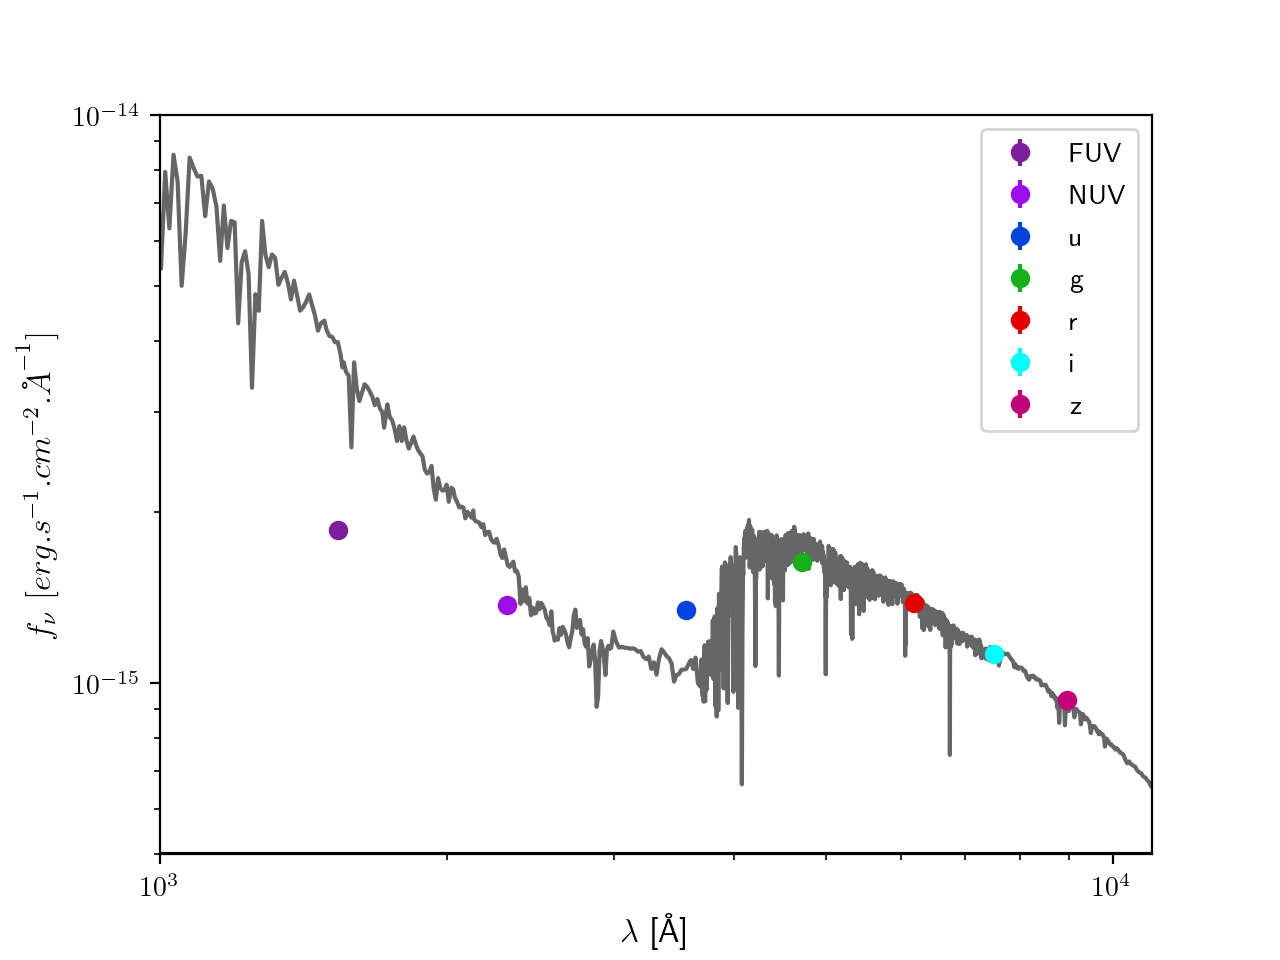

In [8]:
dict_fig = testres.show(y_plot="flux", sed_shifted=False, plot_bandpasses=False, plot_filter_points=True, 
                        xlim=(1000, 11000), ylim=(5e-16, 1e-14), savefile=None, xscale="log", yscale="log", 
                        flux_unit="AA")
dict_fig["ax"].legend(loc="upper right", ncol=1)

<IPython.core.display.Javascript object>


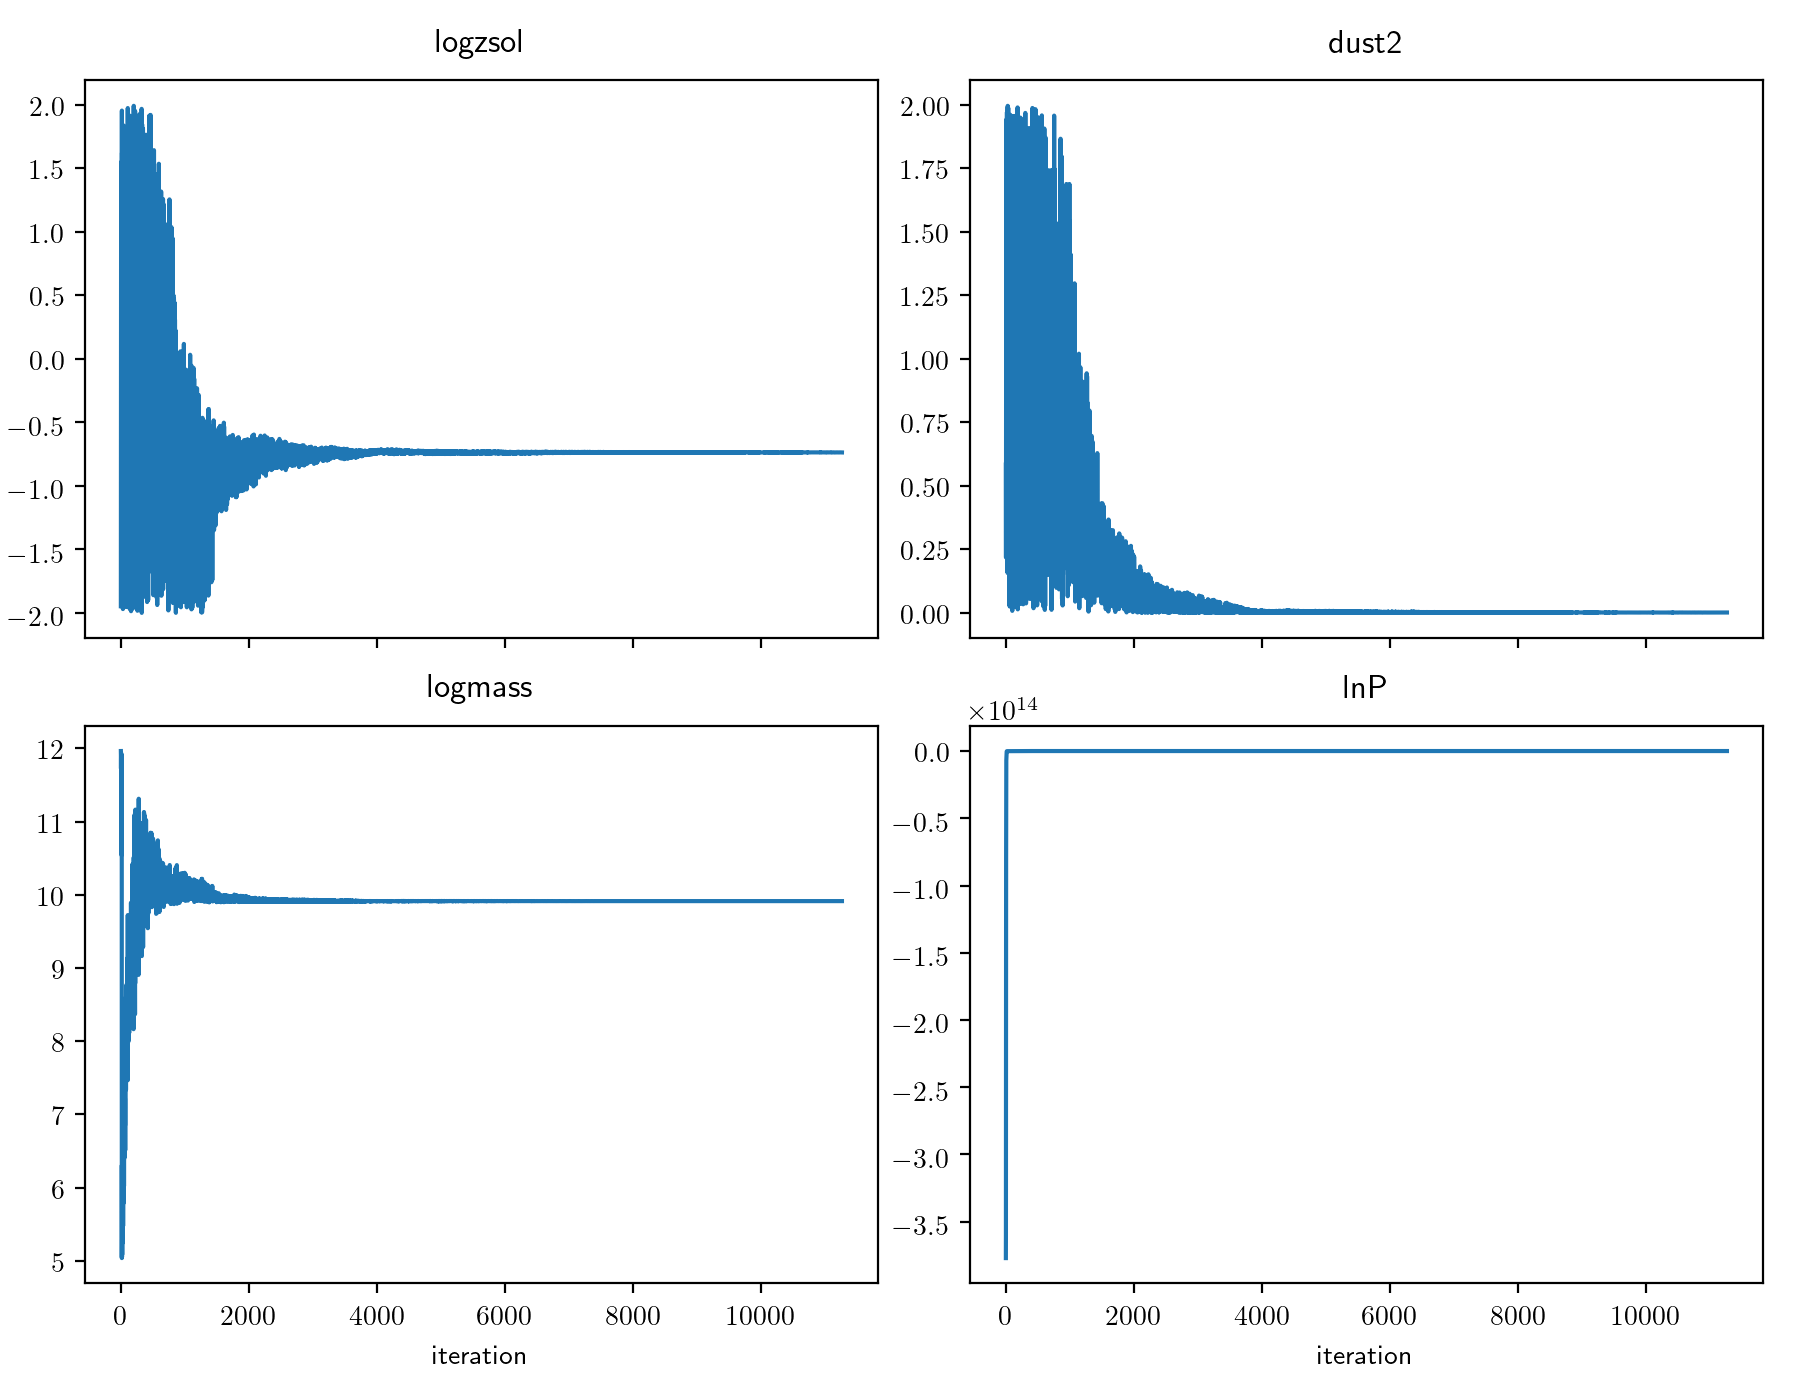

<IPython.core.display.Javascript object>


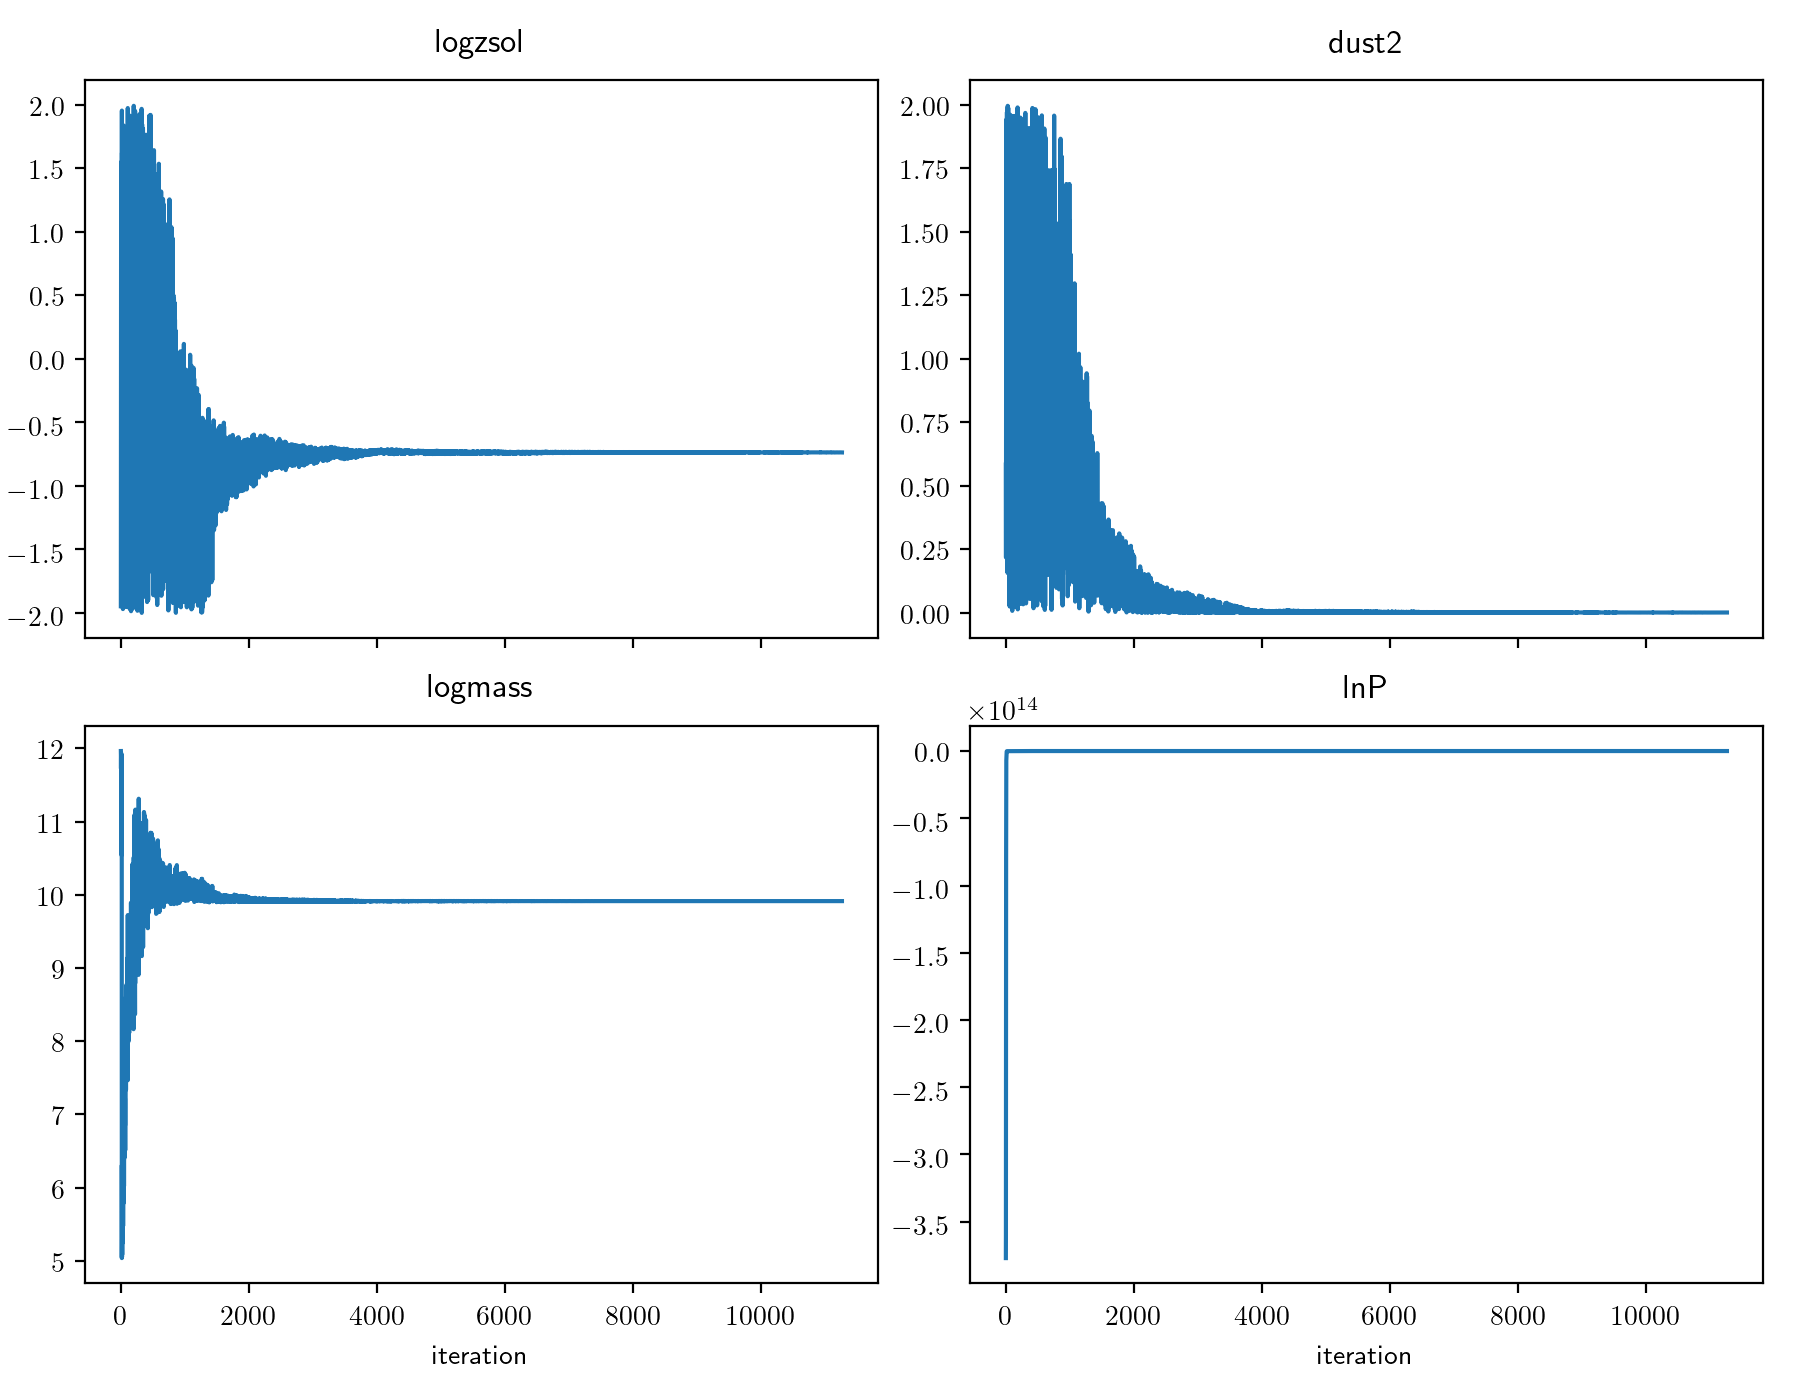

In [9]:
testres.show_walkers(showpars=["logzsol", "dust2", "logmass"])

In [26]:
from prospect.utils.plotting import quantile
post_pcts = [quantile(testres.p_res["chain"][:, i], percents=[16, 50, 84],
                      weights=testres.p_res.get("weights", None))
             for i in range(testres.p_mod.ndim)]

In [27]:
post_pcts

[array([-0.73636075, -0.73589681, -0.73563215]),
 array([0.00130218, 0.00137995, 0.00149574]),
 array([9.91321654, 9.91324336, 9.91328373]),
 array([0.35782564, 0.35839212, 0.35938636]),
 array([-0.71412318, -0.7131353 , -0.71257018])]

In [30]:
(0.35839212 + -0.7131353) - 9.91324336

-10.267986539999999

In [104]:
testsfr.shape

(8905,)

In [28]:
testsfr = (testres.p_res["chain"][:,-1]+testres.p_res["chain"][:,-2]) - testres.p_res["chain"][:,2]

<IPython.core.display.Javascript object>


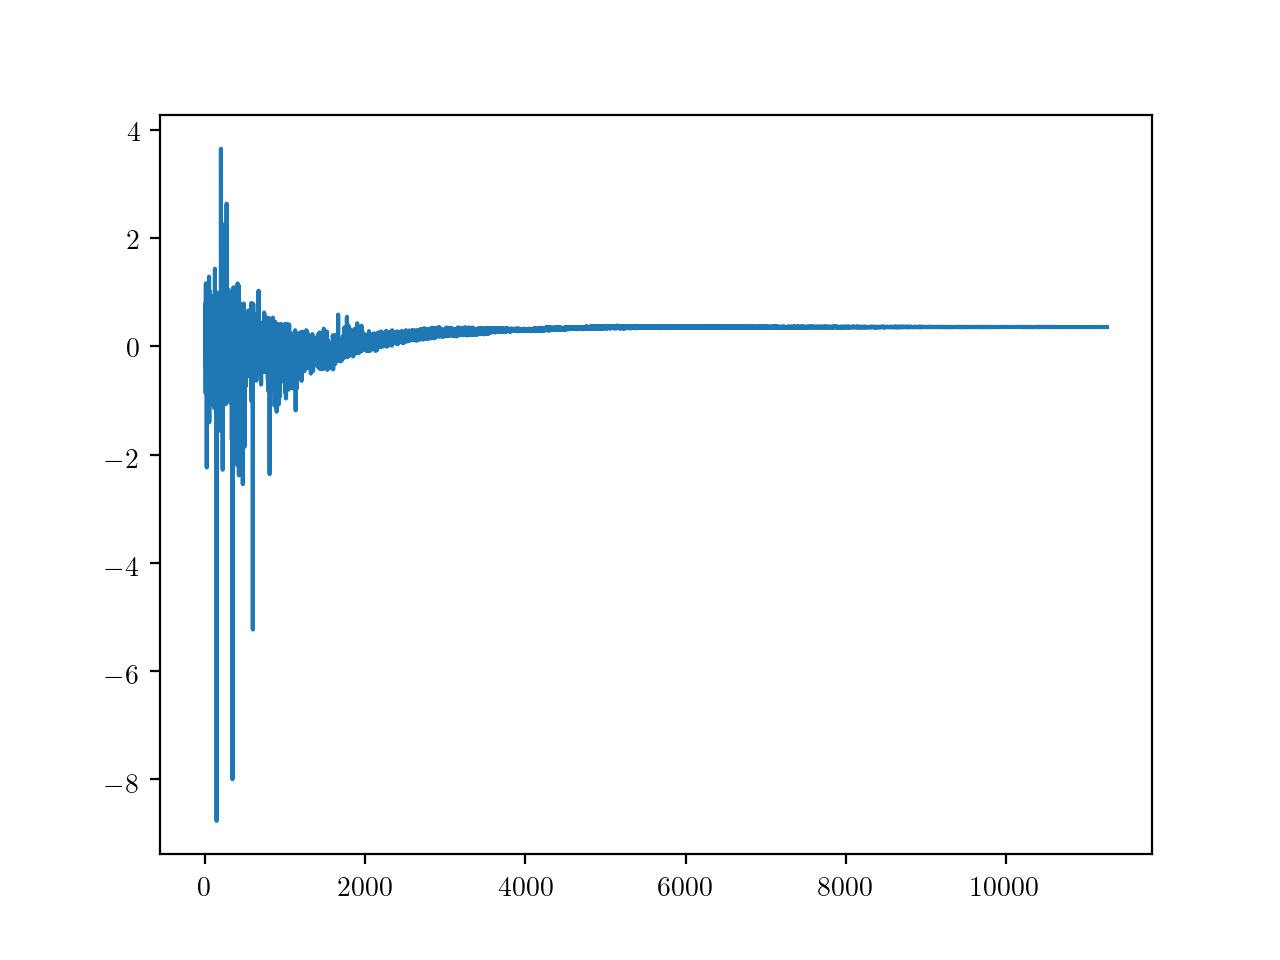

In [20]:
fig, ax = plt.subplots()
ax.plot(testres.p_res["chain"][:,-2])
#ax.set_yscale("log")

In [96]:
testres.p_res

{'model_params': [{'N': 1,
   'isfree': False,
   'init': 0.0280384665386686,
   'units': 'redshift',
   'prior': b'\x80\x02cprospect.models.priors\nTopHat\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00aliasq\x03}q\x04(X\x04\x00\x00\x00miniq\x05h\x05X\x04\x00\x00\x00maxiq\x06h\x06uX\x06\x00\x00\x00paramsq\x07}q\x08(h\x05G\x00\x00\x00\x00\x00\x00\x00\x00h\x06G@\x10\x00\x00\x00\x00\x00\x00uX\x04\x00\x00\x00nameq\tX\x00\x00\x00\x00q\nub.',
   'name': 'zred'},
  {'N': 4,
   'isfree': False,
   'init': 1000000.0,
   'units': 'M$_\\odot$',
   'depends_on': ['logsfr_ratios_to_masses_flex',
    'prospect.models.transforms'],
   'name': 'mass'},
  {'N': 1,
   'isfree': True,
   'init': -0.3,
   'units': '$\\log (Z/Z_\\odot)$',
   'prior': b'\x80\x02cprospect.models.priors\nTopHat\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00aliasq\x03}q\x04(X\x04\x00\x00\x00miniq\x05h\x05X\x04\x00\x00\x00maxiq\x06h\x06uX\x06\x00\x00\x00paramsq\x07}q\x08(h\x05G\xc0\x00\x00\x00\x00\x00\x00\x00h\x06G@\x00\x00\x00\x00\x00\x00

In [30]:
from prospect.io.read_results import traceplot

<IPython.core.display.Javascript object>


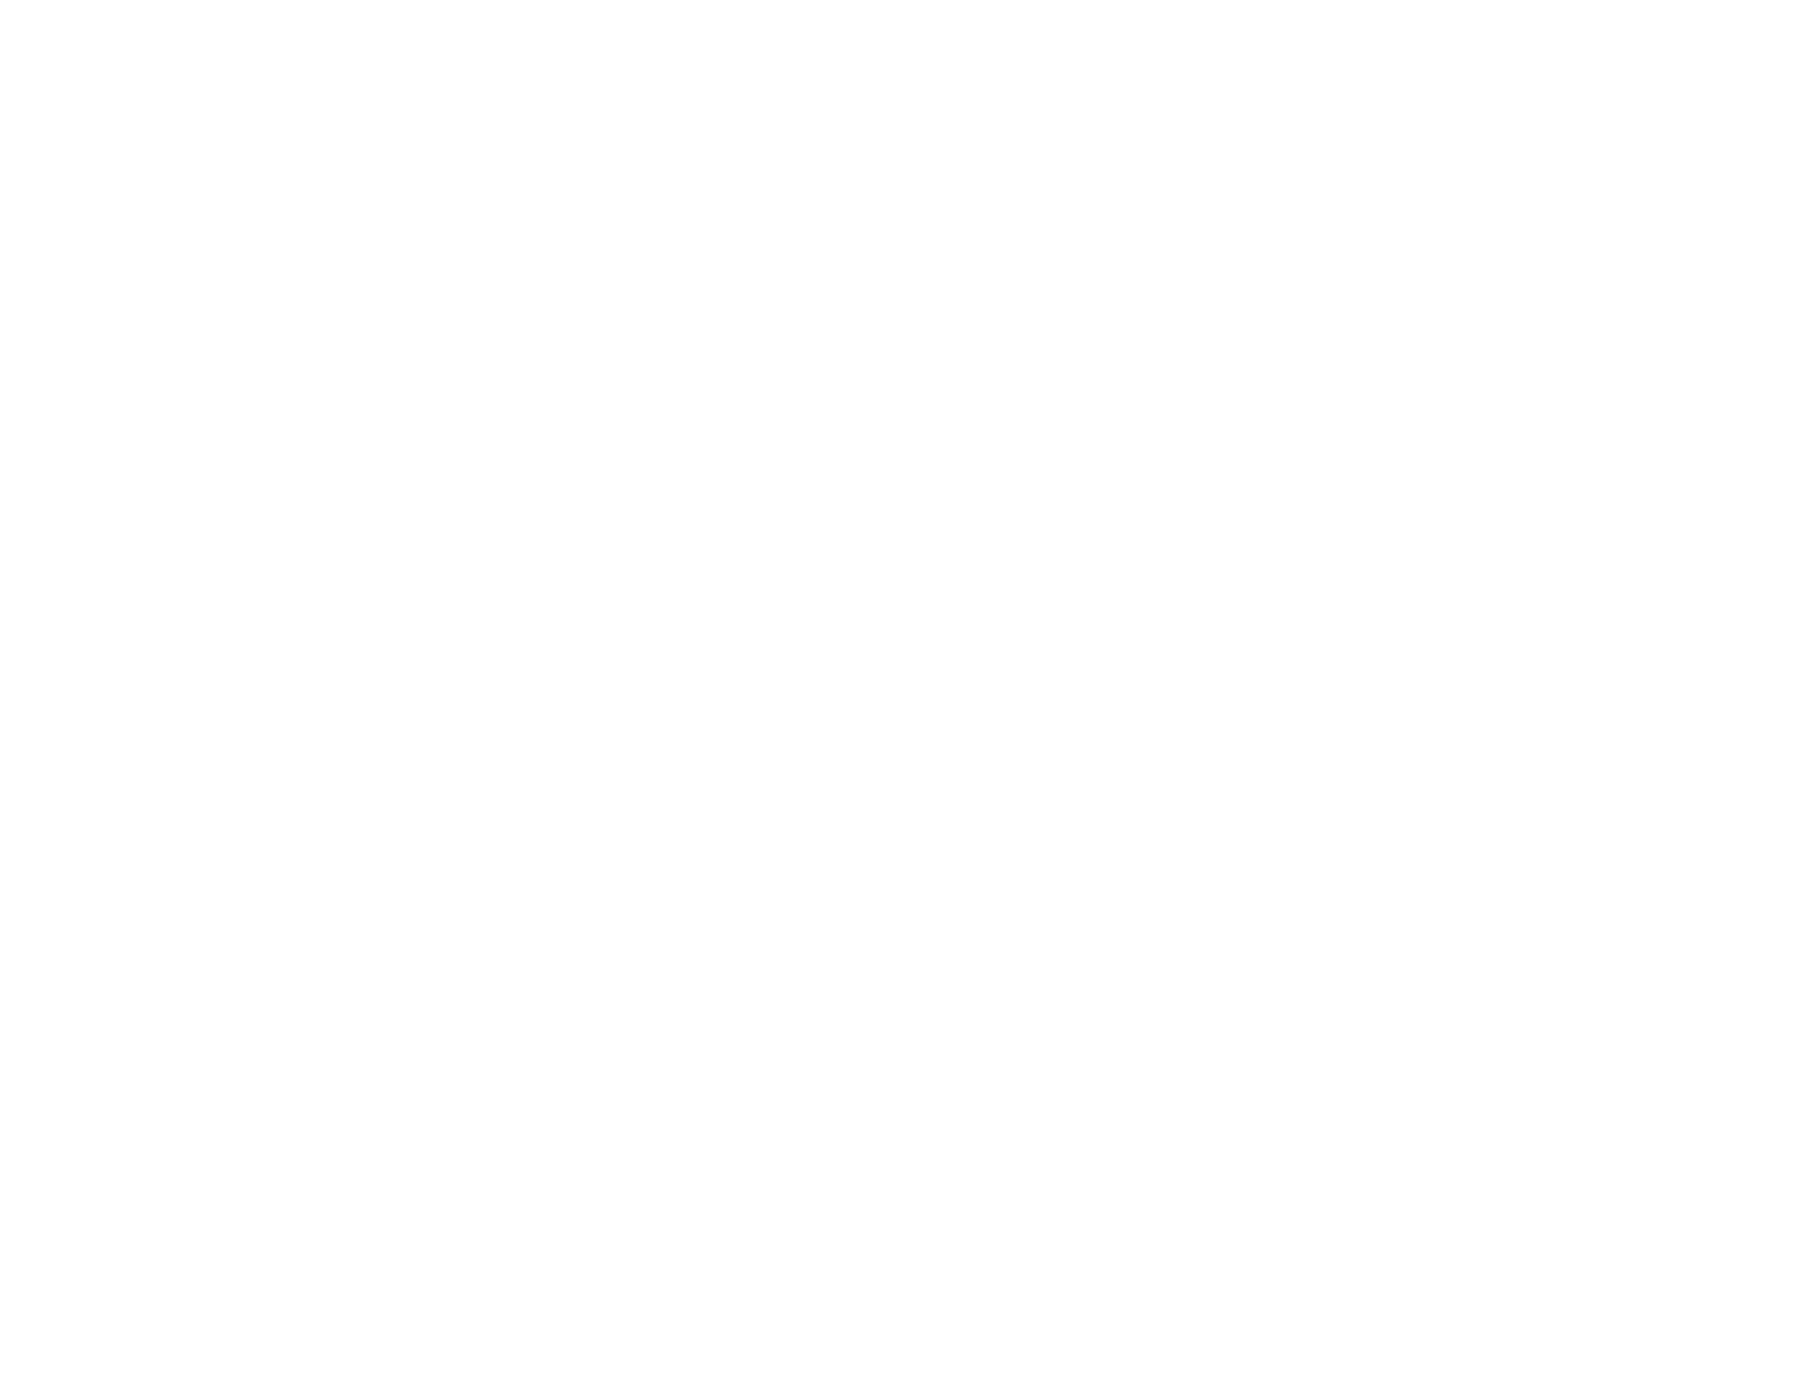

RuntimeError: latex was not able to process the following string:
b'logsfr_ratios_1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/mart1/.matplotlib/tex.cache/f08bebe17a7a14b67f2b26fef5b355eb.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f08bebe17a7a14b67f2b26fef5b355eb.aux)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...ze{12.000000}{15.000000}{\sffamily logsfr_
                                                  ratios_1}
No pages of output.
Transcript written on f08bebe17a7a14b67f2b26fef5b355eb.log.




In [43]:
traceplot(testres.p_res, showpars=["logsfr_ratios_1", "logzsol", "dust2", "logmass"], figsize=(9,7), )

In [11]:
np.array(testres.sed_stack)[:,0].shape

(1000,)

In [12]:
testres.read_fit_results(filename="test_snf_"+sn_name+"_mcmc_emcee.h5")

In [13]:
testres.p_res

{'model_params': [{'N': 1,
   'isfree': False,
   'init': 0.0280384665386686,
   'units': 'redshift',
   'prior': b'\x80\x02cprospect.models.priors\nTopHat\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00aliasq\x03}q\x04(X\x04\x00\x00\x00miniq\x05h\x05X\x04\x00\x00\x00maxiq\x06h\x06uX\x06\x00\x00\x00paramsq\x07}q\x08(h\x05G\x00\x00\x00\x00\x00\x00\x00\x00h\x06G@\x10\x00\x00\x00\x00\x00\x00uX\x04\x00\x00\x00nameq\tX\x00\x00\x00\x00q\nub.',
   'name': 'zred'},
  {'N': 3,
   'isfree': False,
   'init': 1000000.0,
   'units': 'M$_\\odot$',
   'depends_on': ['logsfr_ratios_to_masses', 'prospect.models.transforms'],
   'name': 'mass'},
  {'N': 1,
   'isfree': True,
   'init': -0.3,
   'units': '$\\log (Z/Z_\\odot)$',
   'prior': b'\x80\x02cprospect.models.priors\nTopHat\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00aliasq\x03}q\x04(X\x04\x00\x00\x00miniq\x05h\x05X\x04\x00\x00\x00maxiq\x06h\x06uX\x06\x00\x00\x00paramsq\x07}q\x08(h\x05G\xc0\x00\x00\x00\x00\x00\x00\x00h\x06G@\x00\x00\x00\x00\x00\x00\x00uX\x0

In [27]:
testc = testres.p_res["chain"]

In [34]:
testc[[0,2],[1,3],:].shape

(2, 5)

In [ ]:
np.random.randint()

In [9]:
testres.sed_stack.shape

(500, 5994)

In [16]:
testkcorr = testres.get_kcorr_error()

In [33]:
np.mean(testsfr, axis=0, )

-10.234306089690929

<IPython.core.display.Javascript object>


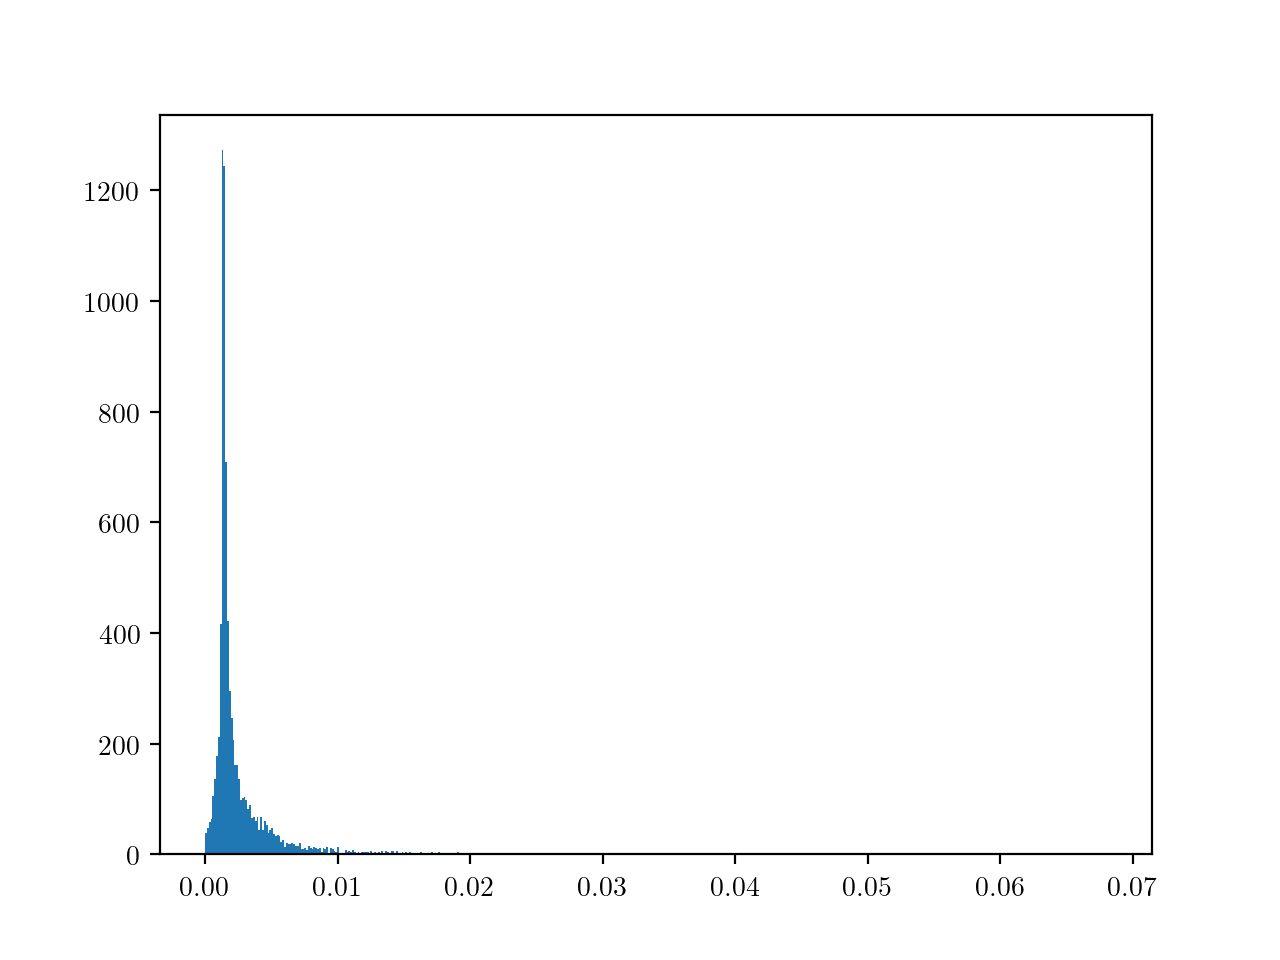

(array([3.800e+01, 4.800e+01, 5.900e+01, 6.400e+01, 1.060e+02, 1.360e+02,
        1.770e+02, 2.130e+02, 4.160e+02, 1.272e+03, 1.243e+03, 7.090e+02,
        4.210e+02, 2.960e+02, 2.470e+02, 2.060e+02, 1.610e+02, 1.620e+02,
        1.370e+02, 9.800e+01, 1.020e+02, 1.030e+02, 9.800e+01, 8.200e+01,
        9.000e+01, 6.500e+01, 6.800e+01, 6.100e+01, 6.800e+01, 4.400e+01,
        6.800e+01, 4.400e+01, 6.100e+01, 5.400e+01, 3.800e+01, 4.400e+01,
        4.700e+01, 3.700e+01, 3.300e+01, 3.500e+01, 3.300e+01, 2.300e+01,
        2.600e+01, 1.400e+01, 2.100e+01, 1.800e+01, 1.800e+01, 2.000e+01,
        1.800e+01, 1.500e+01, 1.600e+01, 2.000e+01, 9.000e+00, 1.000e+01,
        1.200e+01, 8.000e+00, 1.500e+01, 1.100e+01, 1.000e+01, 1.300e+01,
        1.100e+01, 9.000e+00, 1.100e+01, 4.000e+00, 1.100e+01, 9.000e+00,
        1.300e+01, 3.000e+00, 1.200e+01, 9.000e+00, 6.000e+00, 5.000e+00,
        1.300e+01, 0.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 4.000e+00,
        7.000e+00, 5.000e+00, 8.000e+0

In [23]:
fig, ax = plt.subplots()
ax.hist(testres.p_res["chain"][:,1][3000:], bins="auto")

In [23]:
np.mean(testkcorr, axis=0)

array([4.36317990e-29, 5.13969792e-29, 7.13911096e-29, 1.77336015e-28,
       2.40339115e-28, 2.90015988e-28, 3.66581892e-28])

In [24]:
testres.data_kcorr

{'FUV': {'flux': 4.074852076849915e-29,
  'mag': (22.404181811455977, 0.0),
  'mag.err': 1.0428544907904804,
  'flux.err': 1.5649681924407176e-29},
 'NUV': {'flux': 4.619152960246324e-29,
  'mag': (22.33490320922005, 0.0),
  'mag.err': 0.025681339628858883,
  'flux.err': 3.1390632169113464e-32},
 'u': {'flux': 7.031193709060348e-29,
  'mag': (21.80884516108383, 0.0),
  'mag.err': 0.5535039144779947,
  'flux.err': 2.274681675717461e-29},
 'g': {'flux': 1.659279917604633e-28,
  'mag': (20.812398987094028, 0.0),
  'mag.err': 0.07850827401142979,
  'flux.err': 8.612673194374014e-31},
 'r': {'flux': 2.205646126899124e-28,
  'mag': (20.51830717341379, 0.0),
  'mag.err': 0.07809008744012047,
  'flux.err': 1.37065282391698e-30},
 'i': {'flux': 2.7279899322782395e-28,
  'mag': (20.26364765160946, 0.0),
  'mag.err': 0.09397498540695892,
  'flux.err': 2.5579004607034792e-30},
 'z': {'flux': 3.471968807842956e-28,
  'mag': (20.013291092244895, 0.0),
  'mag.err': 0.2231178828343161,
  'flux.err': 2

In [7]:
"Hz" in ("Hz", "Herz")

True

In [8]:
from astropy import units

In [9]:
test = 12
testu = units.m

In [12]:
test *= 2 * testu * units.s 

UnitTypeError: Cannot store quantity with dimension resulting from multiply function in a non-Quantity instance.

In [18]:
test = np.array([1, 2, 3, 4])

In [19]:
test = 2 * test * testu * units.s 
test

<Quantity [2., 4., 6., 8.] m s>

In [17]:
testres.p_res

{'model_params': [{'N': 1,
   'isfree': False,
   'init': 0.037241960987646434,
   'units': 'redshift',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0),
   'name': 'zred'},
  {'N': 1,
   'isfree': True,
   'init': 10000000000.0,
   'units': 'Solar masses formed',
   'prior': <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0),
   'name': 'mass'},
  {'N': 1,
   'isfree': True,
   'init': -0.5,
   'units': '$\\log (Z/Z_\\odot)$',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19),
   'name': 'logzsol'},
  {'N': 1,
   'isfree': True,
   'init': 0.6,
   'units': 'optical depth at 5500AA',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0),
   'name': 'dust2'},
  {'N': 1, 'isfree': False, 'init': 4, 'units': 'FSPS index', 'name': 'sfh'},
  {'N': 1,
   'isfree': True,
   'init': 1,
   'units': 'Gyr',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8),
   'name': 'tage'},
  {'N

In [18]:
len(testres.get_sed_wavelength())

5994

In [19]:
len(testres.data_sed)

5994

In [21]:
testres.p_res["chain"][-1000:, :].shape

(1000, 5)

In [6]:
test = testres.get_sed_error()

TypeError: Required argument 'object' (pos 1) not found

In [50]:
theta = testres.p_res["chain"][-500:, :]
mspec = np.empty((500, len(testres.get_sed_wavelength())))
for ii in range(500):
    mspec[ii], _, _ = testres.p_mod.mean_model(theta[ii], testres.p_obs, sps=testres.p_sps)

In [26]:
mspec.shape

(100, 5994)

<IPython.core.display.Javascript object>


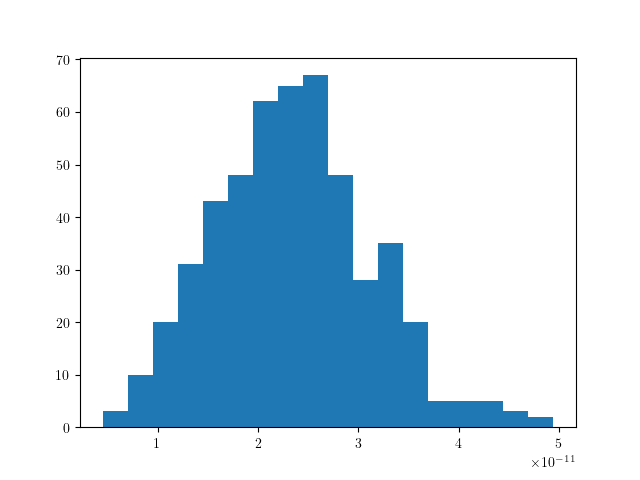

(array([ 3., 10., 20., 31., 43., 48., 62., 65., 67., 48., 28., 35., 20.,
         5.,  5.,  5.,  3.,  2.]),
 array([4.49843045e-12, 6.99670411e-12, 9.49497777e-12, 1.19932514e-11,
        1.44915251e-11, 1.69897987e-11, 1.94880724e-11, 2.19863461e-11,
        2.44846197e-11, 2.69828934e-11, 2.94811670e-11, 3.19794407e-11,
        3.44777143e-11, 3.69759880e-11, 3.94742617e-11, 4.19725353e-11,
        4.44708090e-11, 4.69690826e-11, 4.94673563e-11]),
 <a list of 18 Patch objects>)

In [51]:
fig, ax = plt.subplots()
ax.hist(mspec[:, -1], bins="auto")

In [44]:
np.mean(mspec, axis=0)

array([3.74832127e-17, 4.15410016e-17, 5.09986409e-17, ...,
       2.16138794e-11, 2.10417779e-11, 2.04989460e-11])

In [41]:
mspec.shape

(100, 5994)

In [9]:
from astropy import units


In [10]:
units.spectral_density(np.asarray([1500, 2000]) * units.AA)

[(Unit("erg / (Angstrom cm2 s)"),
  Unit("erg / (cm2 Hz s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter(x)>),
 (Unit("erg / (cm2 Hz s)"),
  Unit("erg / (cm2 s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter_f_nu_to_nu_f_nu(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter_f_nu_to_nu_f_nu(x)>),
 (Unit("erg / (Angstrom cm2 s)"),
  Unit("erg / (cm2 s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter_f_la_to_la_f_la(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter_f_la_to_la_f_la(x)>),
 (Unit("ph / (Angstrom cm2 s)"),
  Unit("erg / (Angstrom cm2 s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter_phot_f_la_to_f_la(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter_phot_f_la_to_f_la(x)>),
 (U

In [14]:
testset = "dirichlet_sfh"

from prospect.models.templates import TemplateLibrary
# Show all pre-defined parameter sets
TemplateLibrary.show_contents()
# Show details on the "parameteric" set of parameters
TemplateLibrary.describe(testset)
# Simply print all parameter specifications in "parametric_sfh"
print(TemplateLibrary[testset])

'type_defaults':
  Explicitly sets dust amd IMF types.
'ssp':
  Basic set of (free) parameters for a delta function SFH
'parametric_sfh':
  Basic set of (free) parameters for a delay-tau SFH.
'dust_emission':
  The set of (fixed) dust emission parameters.
'nebular':
  The set of nebular emission parameters, with gas_logz tied to stellar logzsol.
'agn':
  The set of (fixed) AGN dusty torus emission parameters.
'igm':
  The set of (fixed) IGM absorption parameters.
'spectral_smoothing':
  Set of parameters for spectal smoothing.
'optimize_speccal':
  Set of parameters (most of which are fixed) for optimizing a polynomial calibration vector.
'fit_speccal':
  Set of parameters (most of which are free) for sampling the coefficients of a polynomial calibration vector.
'burst_sfh':
  The set of (fixed) parameters for an SF burst added to a parameteric SFH, with the burst time controlled by `fage_burst`.
'logm_sfh':
  Non-parameteric SFH fitting for log-mass in fixed time bins
'continuity_sfh'

In [35]:
import prospect.models as md

In [40]:
mdp = md.transforms

In [39]:
mdp.sfratio_to_sfr()

SyntaxError: invalid syntax (<ipython-input-39-1bce37f4f822>, line 1)

In [1]:
import fsps

In [2]:
fsps.list_filters()

['v',
 'u',
 'b',
 'buser_b',
 'cousins_r',
 'cousins_i',
 'cfht_b',
 'cfht_r',
 'cfht_i',
 '2mass_j',
 '2mass_h',
 '2mass_ks',
 'sdss_u',
 'sdss_g',
 'sdss_r',
 'sdss_i',
 'sdss_z',
 'wfpc2_f255w',
 'wfpc2_f300w',
 'wfpc2_f336w',
 'wfpc2_f439w',
 'wfpc2_f450w',
 'wfpc2_f555w',
 'wfpc2_f606w',
 'wfpc2_f814w',
 'wfpc2_f850lp',
 'wfc_acs_f435w',
 'wfc_acs_f475w',
 'wfc_acs_f555w',
 'wfc_acs_f606w',
 'wfc_acs_f625w',
 'wfc_acs_f775w',
 'wfc_acs_f814w',
 'wfc_acs_f850lp',
 'wfc3_uvis_f218w',
 'wfc3_uvis_f225w',
 'wfc3_uvis_f275w',
 'wfc3_uvis_f336w',
 'wfc3_uvis_f390w',
 'wfc3_uvis_f438w',
 'wfc3_uvis_f475w',
 'wfc3_uvis_f555w',
 'wfc3_uvis_f606w',
 'wfc3_uvis_f775w',
 'wfc3_uvis_f814w',
 'wfc3_uvis_f850lp',
 'wfc3_ir_f098m',
 'wfc3_ir_f105w',
 'wfc3_ir_f110w',
 'wfc3_ir_f125w',
 'wfc3_ir_f140w',
 'wfc3_ir_f160w',
 'irac_1',
 'irac_2',
 'irac_3',
 'irac_4',
 'isaac_ks',
 'fors_v',
 'fors_r',
 'nicmos_f110w',
 'nicmos_f160w',
 'galex_fuv',
 'galex_nuv',
 'des_g',
 'des_r',
 'des_i',
 'des_z

In [15]:
test = 2

In [16]:
test.get("test", False)

AttributeError: 'int' object has no attribute 'get'